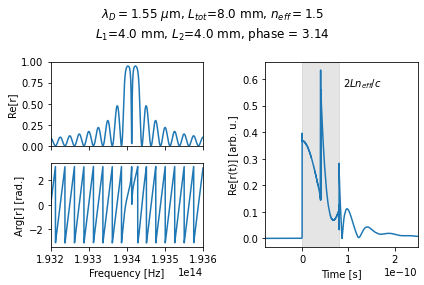

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

c = 2.9979e8
lambda_D = 1.55e-6
freq_D = c/lambda_D
v = 1
delta_neff_1 = 1.5e-4
delta_neff_2 = 1.5e-4
neff = 1.5
L_1 = 4e-3
L_2 = 4e-3
L_tot = L_1 + L_2

freq = np.linspace(c/1.8e-6, c/1.3e-6, 600000)

delta = 2*np.pi*neff*(freq - freq_D)/c
kappa_1 = np.pi*v*delta_neff_1*freq/c
kappa_2 = np.pi*v*delta_neff_2*freq/c

phi = np.pi

S_1 = np.zeros(len(freq), dtype=complex)
S_2 = np.zeros(len(freq), dtype=complex)

for i in range(0, len(freq)):
    S_1[i] = cmath.sqrt(kappa_1[i]**2-delta[i]**2)
    S_2[i] = cmath.sqrt(kappa_2[i]**2-delta[i]**2)

r_1 = -kappa_1*np.sinh(S_1*L_1)/(delta*np.sinh(S_1*L_1)+1j*S_1*np.cosh(S_1*L_1))
r_2 = -kappa_2*np.sinh(S_2*L_2)/(delta*np.sinh(S_2*L_2)+1j*S_2*np.cosh(S_2*L_2))

r = (r_1-np.exp(1j*phi)*r_1*r_2/np.conj(r_1))/(1-np.exp(1j*phi)*r_1*r_2)

time = np.fft.fftshift(np.fft.fftfreq(n=len(freq), d=freq[1]-freq[0]))
r_t = np.fft.fftshift(np.fft.fft(r))/np.sqrt(len(freq))

ax1 = plt.subplot(2, 2, 1)
plt.plot(freq, np.abs(r))
plt.xlim(1.932e14, 1.936e14)
plt.ylim(0, 1)
ax1.set_xticklabels('')
ax1.set_ylabel('Re[r]')
ax2 = plt.subplot(2, 2, 3)
plt.plot(freq, np.angle(r))
plt.xlim(1.932e14, 1.936e14)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Arg[r] [rad.]')

tau = 2*L_tot*neff/c

ax3 = plt.subplot(1, 2, 2)
plt.plot(time, np.abs(r_t))
ax3.axvspan(0, tau, alpha=0.2, color='grey')
plt.xlim(-0.8e-10, 2.5e-10)
ax3.set_ylabel('Re[r(t)] [arb. u.]')
ax3.text(tau*1.1, 0.9*np.max(np.abs(r_t)), r'$2Ln_{eff}/c$')
ax3.set_xlabel('Time [s]')

strength = L_tot*(kappa_1[np.int_(len(freq)/2)]+kappa_2[np.int_(len(freq)/2)])/2

plt.suptitle(r'$\lambda_D=$'+str(lambda_D*1e6)+' $\mu$m, $L_{tot}$='+str(L_tot*1e3)+' mm, $n_{eff}=1.5$\n'+
            '$L_1$='+str(L_1*1e3)+' mm, $L_2$='+str(L_2*1e3)+' mm, phase = '+'{:.3f}'.format(phi))

plt.tight_layout()

2.4971640625965636